<a href="https://colab.research.google.com/github/bayuryunarko/belajar-sklearn/blob/main/1_Simple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Latihan SKLearn dari channel Youtube "Indonesia Belajar"

##Simple Linear Regression

Simple Linear Regression memodelkan hubungan antarasebuah response variable dengan sebuah explanatory variable sebagai suatu garis lurus (linear)

## Sample Dataset



In [5]:
import pandas as pd

pizza = {'diameter': [6,8,10,14,18],
         'harga': [7,9,13,17.5, 18]}
pizza_df = pd.DataFrame(pizza)
pizza_df

,diameter,harga
0,6,7.0
1,8,9.0
2,10,13.0
3,14,17.5
4,18,18.0


## Visualisasi Data

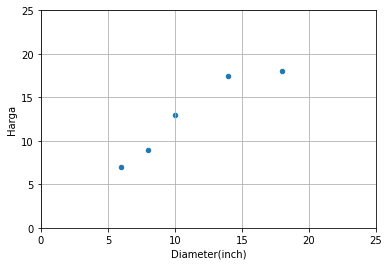

In [6]:
import matplotlib.pyplot as plt

pizza_df.plot(kind='scatter', x='diameter', y='harga')
plt.xlabel('Diameter(inch)')
plt.ylabel('Harga')
plt.xlim(0,25)
plt.ylim(0,25)
plt.grid(True)
plt.show()

## Penyesuaian Dataset

In [12]:
import numpy as np

X = np.array(pizza_df['diameter']) #feature
y = np.array(pizza_df['harga']) #target

print(f'X: {X}')
print(f'y: {y}')

X: [ 6  8 10 14 18]
y: [ 7.   9.  13.  17.5 18. ]


In [13]:
# Model ML yang disertakan pada SKLearn membutuhkan input data feature berupa array 2 dimensi
X = X.reshape(-1,1)
X.shape

(5, 1)

In [14]:
X

array([[ 6],
       [ 8],
       [10],
       [14],
       [18]])

## Training Simple Linear Regression Model

In [15]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Visualisasi Simple Linear Regression Model

In [17]:
X_vis = np.array([0,25]).reshape(-1,1)
y_vis = model.predict(X_vis)

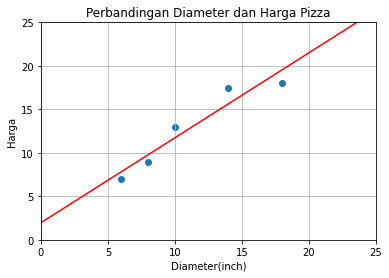

In [18]:
plt.scatter(X, y)
plt.plot(X_vis, y_vis, '-r')

plt.title('Perbandingan Diameter dan Harga Pizza')
plt.xlabel('Diameter(inch)')
plt.ylabel('Harga')
plt.xlim(0,25)
plt.ylim(0,25)
plt.grid(True)
plt.show()

## Formula Linear Regression

In [20]:
print(f'intercept : {model.intercept_}') #konstanta
print(f'slope : {model.coef_}') #koefisien

intercept : 1.965517241379315
slope : [0.9762931]


## Mencari Nilai Slope

In [22]:
print(f'X: \n{X}\n')
print(f'X bentuk awal : {X.flatten()}\n')
print(f'y : {y}')

X: 
[[ 6]
 [ 8]
 [10]
 [14]
 [18]]

X bentuk awal : [ 6  8 10 14 18]

y : [ 7.   9.  13.  17.5 18. ]


In [23]:
## VARIANCE

var_x = np.var(X.flatten(), ddof=1)
print(f'Variance X = {var_x}')

Variance X = 23.2


In [24]:
## COVARIANCE

np.cov(X.flatten(), y)

array([[23.2 , 22.65],
       [22.65, 24.3 ]])

In [29]:
cov_xy = np.cov(X.flatten(), y)[0][1]
print(f'Covariance xy: {cov_xy}')

Covariance xy: 22.650000000000002


In [30]:
## SLOPE

slope = cov_xy/var_x
print(f'Nilai Slope : {slope}')

Nilai Slope : 0.976293103448276


## Mencari Nilai Intercept

In [31]:
intercept = np.mean(y) - slope * np.mean(X)
print(f'Intercept : {intercept}')

Intercept : 1.9655172413793096


## Prediksi Harga Pizza

In [32]:
diameter_pizza = np.array([12, 20, 23]).reshape(-1,1)
diameter_pizza 

array([[12],
       [20],
       [23]])

In [33]:
prediksi_harga = model.predict(diameter_pizza)
prediksi_harga

array([13.68103448, 21.49137931, 24.42025862])

In [35]:
for dmtr, hrg in zip(diameter_pizza, prediksi_harga):
  print(f'Diameter Pizza : {dmtr} dan prediksi harganya adalah {hrg}')

Diameter Pizza : [12] dan prediksi harganya adalah 13.681034482758621
Diameter Pizza : [20] dan prediksi harganya adalah 21.491379310344826
Diameter Pizza : [23] dan prediksi harganya adalah 24.42025862068965


## Evaluasi Simple Linear Regression Model

## Training dan Testing Dataset

In [37]:
X_train = np.array([6, 8, 10, 14, 18]).reshape(-1,1)
y_train = np.array([7, 9, 13, 17.5, 18])

X_test = np.array([8, 9, 11, 16, 12]).reshape(-1,1)
y_test = np.array([11, 8.5, 15, 18, 11])

## Training Simple Linear Regression Model

In [38]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Evaluasi Linear Regression Model dengan Coefficient of Determination atau R-squared (R^2)

In [41]:
from sklearn.metrics import r2_score

y_pred = model.predict(X_test)

r_squared = r2_score(y_test, y_pred)

print(f'R-squared : {r_squared}')

R-squared : 0.6620052929422553
